# 1. 生成数据表

两种数据结构：
+ Series
+ DataFrame

安装：
+ pip install pandas

生成数据表的方法：
+ 一般会通过读取文件获取数据表；
+ 通过dict、list或ndarray等构造DataFrame

首先是引入pandas和numpy，这是经常配合使用的两个包，pandas依赖于numpy，引入以后我们可以直接使用np/pd来表示这个两个模块

In [1]:
import pandas as pd
import numpy as np
# from pandas import DataFrame,Series

## 1.1 读取数据

pandas提供了一些用于将表格型数据读取为DataFrame对象的函数。用的比较多的是read_table和read_csv，两者用法差不多，这里主要介绍read_csv。

用read_csv函数可以读取csv数据，默认数据之间是用逗号分隔开的。有时候数据集并不是这样的，咱们先看看比较完整的读数据参数设定。

In [10]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [56]:
data=pd.read_csv('data/bikes.csv',encoding='latin1',sep=';',parse_dates=['Date'],index_col='Date')
# data['Date'].dtypes
data.tail()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-11,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-02-11,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-03-11,844,NaN,380,612,1137,713,105,1302,NaN
2012-04-11,966,NaN,446,710,1277,692,197,1374,NaN
2012-05-11,2247,NaN,1170,1705,3221,2143,179,2430,NaN


In [2]:
data = pd.read_csv('Data/bikes.csv',encoding='latin1',sep=';',parse_dates=['Date'],index_col=['Date'],header=0)
data.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-02-01,83,NaN,1,68,153,53,6,43,NaN
2012-03-01,135,NaN,2,104,248,89,3,58,NaN
2012-04-01,144,NaN,1,116,318,111,8,61,NaN
2012-05-01,197,NaN,2,124,330,97,13,95,NaN


In [115]:
data.values

array([[3.500e+01,       nan, 0.000e+00, ..., 1.000e+01, 1.600e+01,
              nan],
       [8.300e+01,       nan, 1.000e+00, ..., 6.000e+00, 4.300e+01,
              nan],
       [1.350e+02,       nan, 2.000e+00, ..., 3.000e+00, 5.800e+01,
              nan],
       ...,
       [8.440e+02,       nan, 3.800e+02, ..., 1.050e+02, 1.302e+03,
              nan],
       [9.660e+02,       nan, 4.460e+02, ..., 1.970e+02, 1.374e+03,
              nan],
       [2.247e+03,       nan, 1.170e+03, ..., 1.790e+02, 2.430e+03,
              nan]])

In [33]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


读取的数据完全不对。需要对read_csv内部相应的参数进行相应的设置,read_csv有相应的参数需要我们设定一下，参数的具体见[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table)。对于上面的数据：
+ 分隔符需要用到‘;’
+ 编码类型是‘latin1’,系统默认的是‘utf-8’
+ 有时间字段，需要对时间字段进行解析，并且进行排序

In [ ]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';',  parse_dates=['Date'],encoding='latin1',header=0, dayfirst=True, index_col='Date')

In [ ]:
fixed_df.head()

In [ ]:
fixed_df.index

也存在其他更加高效的磁盘存储格式（如json、xml、excel等），加载数据库中的数据，或者利用Web API操作网络资源等方式，详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#input-output)。 

## 1.2 用pandas创建数据表

构造DataFrame的办法有很多，最常用的一种就是直接传入一个由等长列表或者Numpy数组组成的字典。

In [46]:
data = {'id':[1001,1002,1003,1004,1005,1006], 
        'date':pd.date_range('20130102', periods=6),
        'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
# col = data.keys().append('debt')
# pd.DataFrame(data,index=list('abcdef'),columns=list('opqrst'))
col=['id', 'date', 'city', 'age', 'category', 'price','debt']
pd.DataFrame(data,index=list('abcdef'))

,id,date,city,age,category,price
a,1001,2013-01-02,Beijing,23,100-A,1200.0
b,1002,2013-01-03,SH,44,100-B,NaN
c,1003,2013-01-04,guangzhou,54,110-A,2133.0
d,1004,2013-01-05,Shenzhen,32,110-C,5433.0
e,1005,2013-01-06,shanghai,34,210-A,NaN
f,1006,2013-01-07,BEIJING,32,130-F,4432.0


In [59]:
data = {'id':[1001,1002,1003,1004,1005,1006], 
        'date':pd.date_range('20130102', periods=6),
        'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
pd.DataFrame(data)

,age,category,city,date,id,price
0,23,100-A,Beijing,2013-01-02,1001,1200.0
1,44,100-B,SH,2013-01-03,1002,NaN
2,54,110-A,guangzhou,2013-01-04,1003,2133.0
3,32,110-C,Shenzhen,2013-01-05,1004,5433.0
4,34,210-A,shanghai,2013-01-06,1005,NaN
5,32,130-F,BEIJING,2013-01-07,1006,4432.0


结果中DataFrame会自动加上行索引，而且列索引会进行有序排序。

指定列顺序,如果在列中找不到，就会产生NA值。行索引必须跟数据的长度匹配。

In [107]:
pd.DataFrame(data,columns =['id','date','city','category','age','price','debt'],index=['one','two','three','four','five','six'])

,id,date,city,category,age,price,debt
one,1001,2013-01-02,Beijing,100-A,23,1200.0,NaN
two,1002,2013-01-03,SH,100-B,44,NaN,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0,NaN
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0,NaN
five,1005,2013-01-06,shanghai,210-A,34,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0,NaN


In [50]:
pd.DataFrame(np.random.randint(0,10,(5,5)),index=list('abcde'),columns=list('opqrs'))

,o,p,q,r,s
a,4,8,3,1,3
b,4,5,9,0,5
c,1,0,2,7,8
d,4,2,3,1,0
e,3,3,8,4,4


In [ ]:
pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)),columns=['a', 'b', 'c', 'd', 'e'],index=['one','two','three','four','five'])

更多的构造DataFrame方法见[官方文档](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)。

## 1.3 另一种数据结构Series

Series类似于一维数组的对象，它由一组数据和一组与之相关的标签组成。

In [51]:
obj = pd.Series([5,4,-3,1,-4],index=list('abcde'))
obj

a    5
b    4
c   -3
d    1
e   -4
dtype: int64

In [53]:
obj.values

array([ 5,  4, -3,  1, -4], dtype=int64)

In [ ]:
obj.index

我们希望Series每个值对应一个标签：

In [ ]:
obj = pd.Series([5,4,-3,1,-4],index=['a','b','c','e','d'])
print(obj)

也可以通过字典去构建Series：

In [116]:
sdata={'Shenzhen':10000,'Guangzhou':9500,'Shanghai':11000,'Beijing':11000}
pdata = pd.Series(sdata)
print(pdata)

Shenzhen     10000
Guangzhou     9500
Shanghai     11000
Beijing      11000
dtype: int64


# 2. 信息查看和索引

## 2.1 查看属性和基础数据

可以通过以下的函数获取DataFrame的基本属性和基础数据，详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#attributes-and-underlying-data)：

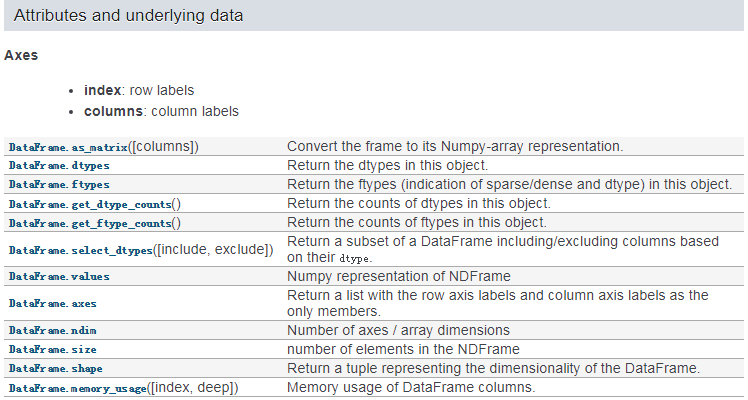

数据表的基本属性包括形状、数据类型、数据信息等

In [65]:
#构造一个DataFrame
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'ShangHai', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'])
#查看数据表的相关属性
print(df)
print(df.shape)#查看DataFrame的形状
# print(df.size)#查看表内所有数据数量
print(df.info())#表的信息,（维度、列名称、数据格式、所占空间等）
# print(df.dtypes)#表的所有列的类型
# print(df.id.dtypes)#表中某一列的数据类型

     id       date         city category  age   price
0  1001 2013-01-02     Beijing     100-A   23  1200.0
1  1002 2013-01-03     ShangHai    100-B   44     NaN
2  1003 2013-01-04   guangzhou     110-A   54  2133.0
3  1004 2013-01-05     Shenzhen    110-C   32  5433.0
4  1005 2013-01-06     shanghai    210-A   34     NaN
5  1006 2013-01-07     BEIJING     130-F   32  4432.0
(6, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
id          6 non-null int64
date        6 non-null datetime64[ns]
city        6 non-null object
category    6 non-null object
age         6 non-null int64
price       4 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 368.0+ bytes
None


In [124]:
df.id.astype(np.str) 

0    1001
1    1002
2    1003
3    1004
4    1005
5    1006
Name: id, dtype: object

In [128]:
#查看表的相关基础数据
print(df.values)#数据表内的值
# print(df.index)#数据表的行索引名
# print(df.columns)#数据表的列索引名称

[[1001 Timestamp('2013-01-02 00:00:00') 'Beijing ' '100-A' 23 1200.0]
 [1002 Timestamp('2013-01-03 00:00:00') 'ShangHai' '100-B' 44 nan]
 [1003 Timestamp('2013-01-04 00:00:00') ' guangzhou ' '110-A' 54 2133.0]
 [1004 Timestamp('2013-01-05 00:00:00') 'Shenzhen' '110-C' 32 5433.0]
 [1005 Timestamp('2013-01-06 00:00:00') 'shanghai' '210-A' 34 nan]
 [1006 Timestamp('2013-01-07 00:00:00') 'BEIJING ' '130-F' 32 4432.0]]


## 2.2 数据表的索引和选取

In [85]:
data=pd.DataFrame(df.values,index=list('abcdef'),columns=df.columns)
data

,id,date,city,category,age,price
a,1001,2013-01-02 00:00:00,Beijing,100-A,23,1200
b,1002,2013-01-03 00:00:00,ShangHai,100-B,44,NaN
c,1003,2013-01-04 00:00:00,guangzhou,110-A,54,2133
d,1004,2013-01-05 00:00:00,Shenzhen,110-C,32,5433
e,1005,2013-01-06 00:00:00,shanghai,210-A,34,NaN
f,1006,2013-01-07 00:00:00,BEIJING,130-F,32,4432


In [90]:
data.loc['a':'c','id':'age']

,id,date,city,category,age
a,1001,2013-01-02 00:00:00,Beijing,100-A,23
b,1002,2013-01-03 00:00:00,ShangHai,100-B,44
c,1003,2013-01-04 00:00:00,guangzhou,110-A,54


In [94]:
data.iloc[:3,2:].loc['a']

city        Beijing 
category       100-A
age               23
price           1200
Name: a, dtype: object

In [102]:
data.iloc[[1,3]]

,id,date,city,category,age,price
b,1002,2013-01-03 00:00:00,ShangHai,100-B,44,NaN
d,1004,2013-01-05 00:00:00,Shenzhen,110-C,32,5433


In [103]:
data

,id,date,city,category,age,price
a,1001,2013-01-02 00:00:00,Beijing,100-A,23,1200
b,1002,2013-01-03 00:00:00,ShangHai,100-B,44,NaN
c,1003,2013-01-04 00:00:00,guangzhou,110-A,54,2133
d,1004,2013-01-05 00:00:00,Shenzhen,110-C,32,5433
e,1005,2013-01-06 00:00:00,shanghai,210-A,34,NaN
f,1006,2013-01-07 00:00:00,BEIJING,130-F,32,4432


In [112]:
a=~data['price'].isna()
b=data['age']<50
is_bool = a & b
is_bool

a     True
b    False
c    False
d     True
e    False
f     True
dtype: bool

In [117]:
data.loc[a & b,'price']

a    1200
d    5433
f    4432
Name: price, dtype: object

In [121]:
data[a & b]

,id,date,city,category,age,price
a,1001,2013-01-02 00:00:00,Beijing,100-A,23,1200
d,1004,2013-01-05 00:00:00,Shenzhen,110-C,32,5433
f,1006,2013-01-07 00:00:00,BEIJING,130-F,32,4432


**选取单列或多个列**

(1) 直接根据列名来选取

In [60]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'],
                   index = ['one','two','three','four','five','six'])
df['id']

one      1001
two      1002
three    1003
four     1004
five     1005
six      1006
Name: id, dtype: int64

In [ ]:
df[['id','city','age']]

(2)运用obj.ix[:,val]选取单列或列子集

In [145]:
df.ix[:3,['id','city','age']]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,id,city,age
one,1001,Beijing,23
two,1002,SH,44
three,1003,guangzhou,54


**选取行的方法，相对来说比较丰富**

（1）通过切片或者布尔型数组选取行

In [ ]:
df[:2]#通过切片

In [ ]:
df[(df['age']>20) & (df['age']<40)][['id','city']]#通过布尔型数组选取行，是DataFrame在语法上更像ndarray

(2) 通过obj.ix[val]，val可以使切片方法，可以是布尔判断，可以是行索引列。

In [ ]:
df.ix[df.age>40]

也可以通过ix同时选取行和列

（3）通过iloc或loc选取行

In [64]:
df.loc[['one','two'],['id','city']]#loc接受的是行索引

,id,city
one,1001,Beijing
two,1002,SH


In [67]:
df.iloc[:3]#iloc根据行号来索引

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0


同时选取行和列

In [68]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [69]:
df.ix[['two','one','three'],[3,0,1]]

d:\program files\python3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,category,id,date
two,100-B,1002,2013-01-03
one,100-A,1001,2013-01-02
three,110-A,1003,2013-01-04


In [71]:
df.loc[['two','one','three']].iloc[:,[3,0,1]]

,category,id,date
two,100-B,1002,2013-01-03
one,100-A,1001,2013-01-02
three,110-A,1003,2013-01-04


(4) 通过obj.head()和obj.tail()查看行

In [166]:
df.tail(3)

,id,date,city,category,age,price
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [74]:
df.head(6) #默认前5行数据

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [75]:
df.tail(2) #默认后5行数据

,id,date,city,category,age,price
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


Pandas为我们提供的索引方法如下图，更详细的信息点击[这里](http://pandas.pydata.org/pandas-docs/stable/api.html#attributes-and-underlying-data)。

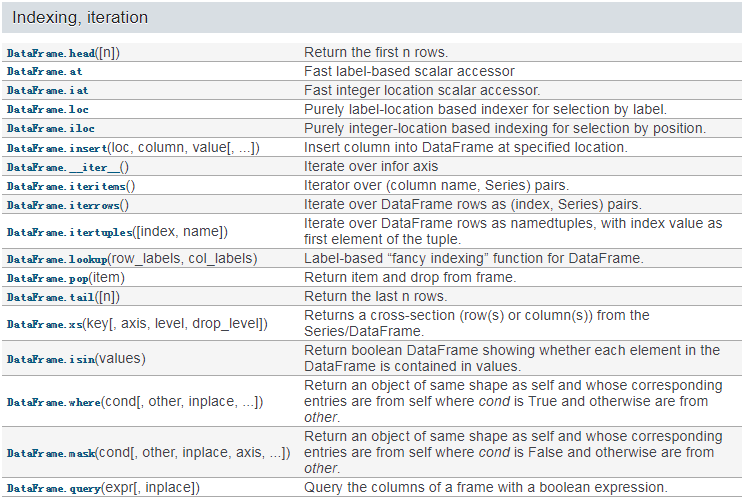

In [124]:
data.head(10)

,id,date,city,category,age,price
a,1001,2013-01-02 00:00:00,Beijing,100-A,23,1200
b,1002,2013-01-03 00:00:00,ShangHai,100-B,44,NaN
c,1003,2013-01-04 00:00:00,guangzhou,110-A,54,2133
d,1004,2013-01-05 00:00:00,Shenzhen,110-C,32,5433
e,1005,2013-01-06 00:00:00,shanghai,210-A,34,NaN
f,1006,2013-01-07 00:00:00,BEIJING,130-F,32,4432


## 2.3 层次化索引

层次化索引是pandas的一项重要功能，它使数据表在一个轴上拥有多个（两个以上）索引级别。

**对于Series**

In [141]:
d.stack().unstack(0).stack()

a  1   -0.131520
   2    0.383699
   3    0.467664
b  1    0.061655
   2    1.152582
   3   -0.174462
c  1    0.185240
   2    0.401345
d  2   -0.169702
   3   -0.410235
dtype: float64

In [133]:
data.loc[['b','a'],[2,3]]

a  2    0.383699
   3    0.467664
b  2    1.152582
   3   -0.174462
dtype: float64

选取子集

In [173]:
# print(data['b'])
# print(data['b':'c'])
# print(data[['b','d']])
print(data[:,2])

a    2.116800
b   -0.109488
c   -0.283204
d    2.404709
dtype: float64


In [ ]:
data

In [175]:
data.unstack(0)

,a,b,c,d
1,0.138266,-0.015037,-1.298553,NaN
2,2.116800,-0.109488,-0.283204,2.404709
3,-0.253726,-0.725797,NaN,0.720914


层次化索引在数据重塑和基于分组的操作中扮演重要的角色。

**对于DataFrame**

In [143]:
frame=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]],
                   columns=[['Shenzhen','Shenzhen','Guangzhou'],['Red','Green','Red']])
frame

Shenzhen       Guangzhou
         Red Green       Red
a 1        0     1         2
  2        3     4         5
b 1        6     7         8
  2        9    10        11

In [82]:
frame.loc['a','Shenzhen']

,Red,Green
1,0,1
2,3,4


In [83]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [85]:
df.iloc[:3,1:3]

,date,city
one,2013-01-02,Beijing
two,2013-01-03,SH
three,2013-01-04,guangzhou


## 2.4 其他

查看是否有空值,用isna()和notna()

In [144]:
df

,id,date,city,category,age,price
0,1001,2013-01-02,Beijing,100-A,23,1200.0
1,1002,2013-01-03,ShangHai,100-B,44,NaN
2,1003,2013-01-04,guangzhou,110-A,54,2133.0
3,1004,2013-01-05,Shenzhen,110-C,32,5433.0
4,1005,2013-01-06,shanghai,210-A,34,NaN
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [91]:
df.isna()#判断是否有空值

,id,date,city,category,age,price
one,False,False,False,False,False,False
two,False,False,False,False,False,True
three,False,False,False,False,False,False
four,False,False,False,False,False,False
five,False,False,False,False,False,True
six,False,False,False,False,False,False


In [92]:
df.price.isna()#可以判断某一列

one      False
two       True
three    False
four     False
five      True
six      False
Name: price, dtype: bool

In [93]:
df.price.notna()#判断不是空值

one       True
two      False
three     True
four      True
five     False
six       True
Name: price, dtype: bool

查看某列的唯一值，用unique(),只能针对Series对象操作

In [189]:
df['city']=df['city'].str.lower()
df.loc[df['city']=='sh','city']='shanghai'

In [190]:
df['city'].unique()

array(['beijing ', 'shanghai', ' guangzhou ', 'shenzhen'], dtype=object)

判断是否在数据表中，用isin()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
id          6 non-null object
date        6 non-null datetime64[ns]
city        6 non-null object
category    6 non-null object
age         6 non-null int64
price       4 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 368.0+ bytes


In [166]:
df.isin(['1002','100-A'])

,id,date,city,category,age,price
0,False,False,False,True,False,False
1,True,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False


In [184]:
df['date'][0].date()

datetime.date(2013, 1, 2)

In [190]:
df

,id,date,city,category,age,price
0,1001,2013-01-02,BEIJING,100-A,23,1200.0
1,1002,2013-01-03,SHANGHAI,100-B,44,NaN
2,1003,2013-01-04,GUANGZHOU,110-A,54,2133.0
3,1004,2013-01-05,SHENZHEN,110-C,32,5433.0
4,1005,2013-01-06,SHANGHAI,210-A,34,NaN
5,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [192]:
from datetime import datetime
lis = ['1001',datetime(2013,1,3),'BEIJING','100-A',23,1200.0]
df.isin(lis)

,id,date,city,category,age,price
0,True,False,True,True,True,True
1,False,True,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,True,False,False,False


In [97]:
df.isin([1200])

,id,date,city,category,age,price
one,False,False,False,False,False,True
two,False,False,False,False,False,False
three,False,False,False,False,False,False
four,False,False,False,False,False,False
five,False,False,False,False,False,False
six,False,False,False,False,False,False


针对选取的单列或Series中各值出现的频率，用value_counts函数。

In [193]:
df = pd.DataFrame({'id':[1001,1002,1003,1004,1005,1006], 
                   'date':pd.date_range('20130102', periods=6),
                   'city':['Beijing ', 'Shanghai', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
                   'age':[23,44,54,32,34,32],
                   'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
                   'price':[1200,np.nan,2133,5433,np.nan,4432]},columns =['id','date','city','category','age','price'],
                   index = ['one','two','three','four','five','six'])
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,Shanghai,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [194]:
df['city'].str.upper().str.strip().value_counts()

SHANGHAI     2
BEIJING      2
GUANGZHOU    1
SHENZHEN     1
Name: city, dtype: int64

In [100]:
df['city'].str.upper().value_counts()#用upper进行字符串的大写，用value_counts()进行频数统计

BEIJING        2
SHANGHAI       2
SHENZHEN       1
 GUANGZHOU     1
Name: city, dtype: int64

# 3. 数据可视化

安装：
+ pip install matplotlib

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

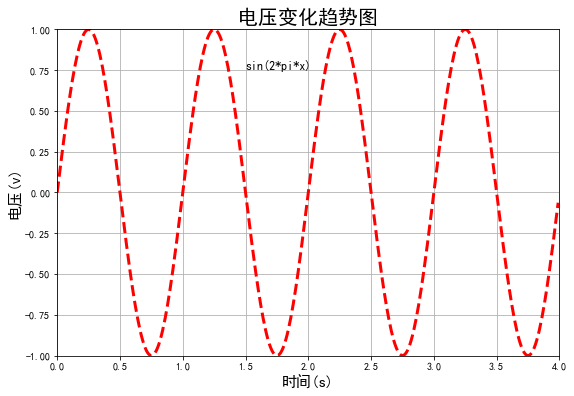

In [229]:
x = np.arange(0,4,0.01)
y = np.sin(2*np.pi*x)
plt.figure(figsize=(9,6))
plt.plot(x,y,color='#FF0000',linestyle='--',linewidth=3)
plt.xlim(0,4)
plt.ylim(-1,1)
plt.xlabel('时间(s)',fontsize=15)
plt.ylabel('电压(v)',fontsize=15)
plt.title('电压变化趋势图',fontsize=20)
plt.grid()
plt.text(1.5,0.75,'sin(2*pi*x)',fontsize=12)
plt.savefig('电压趋势图.png',dpi=100)

## 3.1 matplotlib.pyplot

matplotlib API函数都位于matplotlib.pyplot模块中，详情见[官方文档](https://matplotlib.org/api/pyplot_summary.html)。

In [220]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

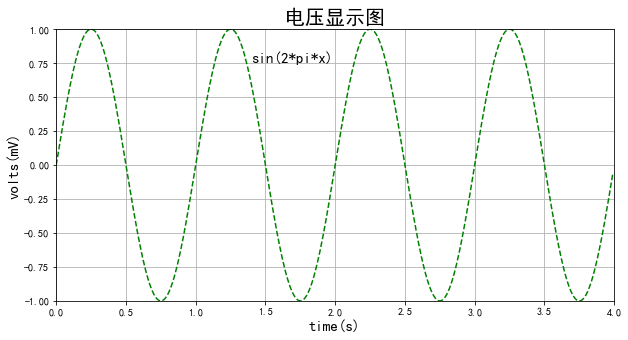

In [229]:
plt.figure(figsize=(10,5))
x = np.arange(0,4,0.01)
y = np.sin(2*np.pi*x)
plt.plot(x,y,color='g',linestyle='--')#画线形图
plt.xlim(0,4)#限制x坐标的显示范围
plt.ylim(-1,1)#显示y坐标的显示范围
plt.grid(True)#显示网格
plt.text(1.4,0.75,'sin(2*pi*x)',fontsize=15)#在图片插入文本
plt.xlabel('time(s)',fontsize=15)#添加x轴的标签
plt.ylabel('volts(mV)',fontsize=15)#y轴的标签
plt.title('电压显示图',fontsize=20)#标题
# plt.show()#显示
plt.savefig('image/image1.png',dpi=400,bbox_inches='tight')#保存图片

In [102]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import pandas as pd
import numpy as np

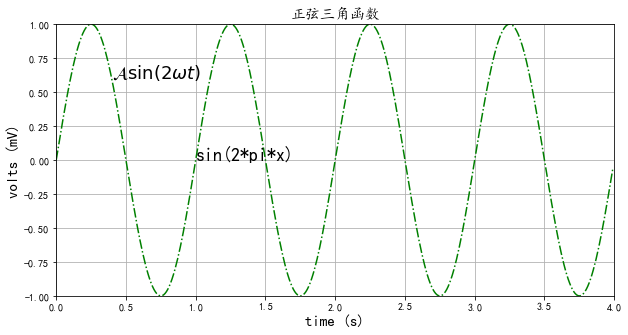

In [119]:
t = np.arange(0.0, 4.0, 0.01)
s = np.sin(2*np.pi*t)
plt.rcParams['font.serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False 

fig1 = plt.figure(figsize=(10,5))#新建figure，设置图片的大小

plt.plot(t,s,'g-.')#画出图形
plt.title(r'正弦三角函数', fontsize=15)#设置标题
plt.text(1, 0, r'sin(2*pi*x)', fontsize=18)#设置文本
plt.text(0.4, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',fontsize=18)#设置文本
plt.xlabel('time (s)',fontsize = 15)#x轴的标签
plt.ylabel('volts (mV)',fontsize=15)#y轴的标签
plt.grid(True)#设置网格
plt.xlim(0,4)#设置x轴方向的刻度范围
plt.ylim(-1,1)#设置y轴方向的刻度范围
plt.savefig('图片/MathPlot1.png',dpi=400,bbox_inches='tight')#保存图片

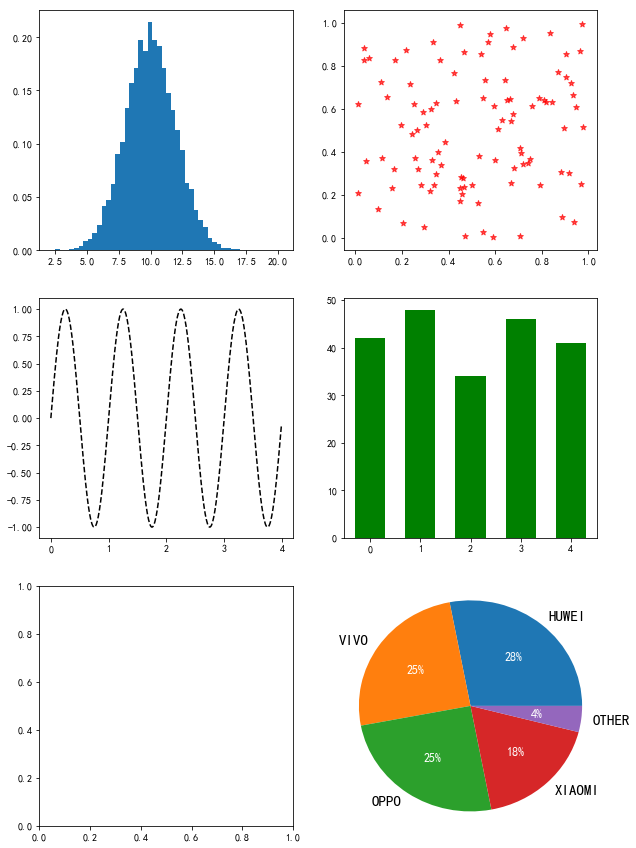

In [276]:
plt.rcParams['font.serif'] = ['KaiTi']

fig = plt.figure(figsize=(10,15))
ax=fig.subplots(3,2)
x=np.random.normal(10,2,(10000))
ax[0][0].hist(x,bins=50,density=True)#直方图/条形图


x1 = np.random.rand(100)
y1 = np.random.rand(100)
ax[0][1].scatter(x1,y1,marker='*',color='r',alpha=0.7)

t = np.arange(0.0, 4.0, 0.01)
s = np.sin(2*np.pi*t)
ax[1][0].plot(t,s,'k--')

x = range(0,5)
h = np.random.randint(30,50,(5))
ax[1][1].bar(x,h,width=0.6,color='g')

x=[28,25,25,18,4]
labels=['HUWEI','VIVO','OPPO','XIAOMI','OTHER']
_,texts,autotexts=ax[2][1].pie(x,labels=labels,autopct='%.0f%%',radius=1.1)
for text in texts:
    text.set_size(15)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(12)
    
plt.savefig('bba.png',dpi=300)

<BarContainer object of 4 artists>

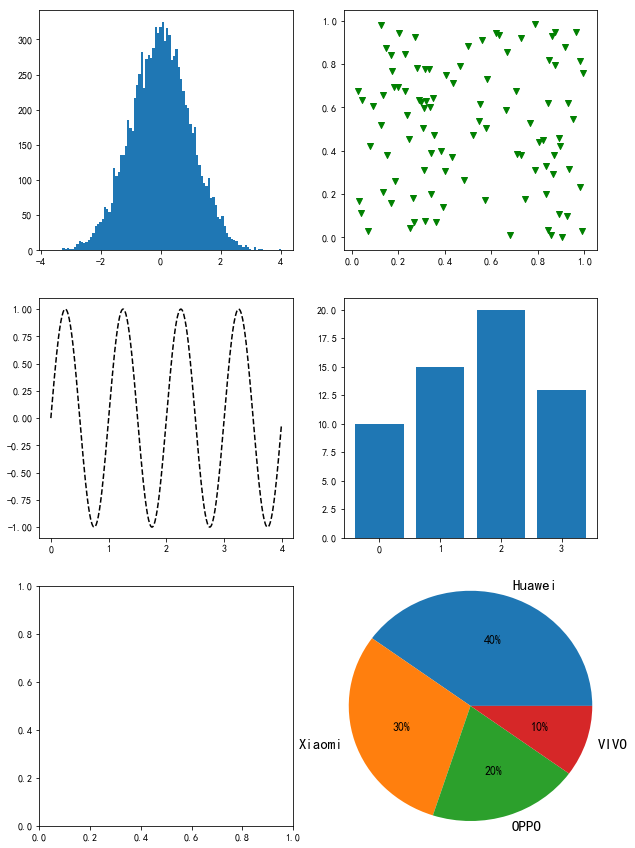

In [307]:
np.random.seed(1)
fig = plt.figure(figsize=(10,15))
ax = fig.subplots(3,2)
x1 = np.random.randn(10000)
ax[0][0].hist(x1,bins=100)#条形图
x2 = np.random.rand(100)
y2 = np.random.rand(100)
ax[0][1].scatter(x2,y2,color='g',marker='v')
t = np.arange(0.0, 4.0, 0.01)
s = np.sin(2*np.pi*t)
ax[1][0].plot(t,s,'k--')

x = [40,30,20,10]
label = ['Huawei','Xiaomi','OPPO','VIVO']
patches, texts, autotexts=ax[2][1].pie(x,labels=label,autopct='%.0f%%',radius=1.2)
for text in texts:
    text.set_size(15)
for a in autotexts:
    a.set_size(12)

x = range(4)    
h = [10,15,20,13]
ax[1][1].bar(x,h)

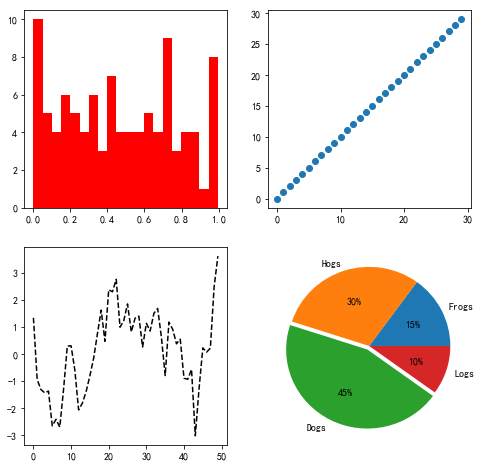

In [173]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import pandas as pd
import numpy as np

fig2=plt.figure(figsize=(8,8))
((ax1, ax2), (ax3, ax4)) = fig2.subplots(2, 2)
#fig2.subplots_adjust(wspace=0.2,left=0,right=0.5)

ax1.hist(np.random.rand(100),bins=20,color='r',alpha=1)#条形图
ax2.scatter(np.arange(30),np.arange(30))#散点图
ax3.plot(np.random.randn(50).cumsum(),'k--')#线状图

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
fracs = [15, 30, 45, 10]
explode = [0.00, 0.00, 0.05, 0]
ax4.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%')#饼状图
plt.savefig('图片/MathPlot12.png',dpi=400,bbox_inches='tight')#保存图片
plt.show()

## 3.2 Pandas中的绘图函数

matplotlib实际上是一个比较低级的工具，要组装一张图，需要各种基础组件，如数据展示、图例、标题、刻度标签以及其他注释型信息。

在pandas中，有专门针对绘图的函数如下，详情见[官方网站](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)。

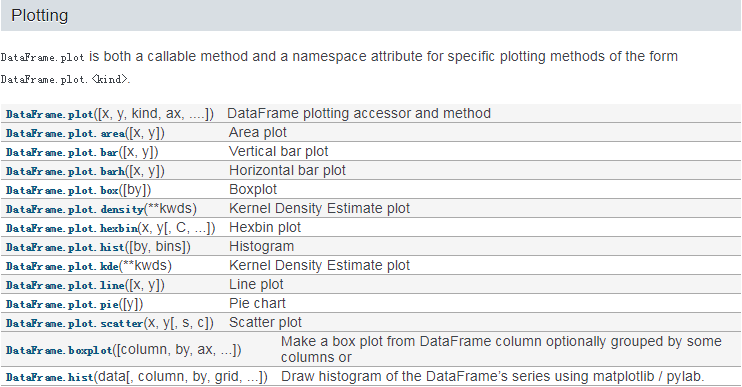

### 3.2.1 线状图

In [278]:
df = pd.DataFrame(abs(np.random.randn(12,4)).cumsum(axis=0),columns=list('ABCD'),index = np.arange(1,13))
print(df)

            A         B         C         D
1    2.167641  0.909483  1.384445  0.112770
2    3.359242  1.264497  1.502839  0.811746
3    3.882965  1.886901  2.120545  0.988111
4    4.547392  2.123786  2.923288  1.764646
5    6.204759  2.548478  2.967749  2.934069
6    8.183883  2.770005  3.108370  3.801494
7    8.760211  4.072788  3.556922  4.274245
8    9.260898  4.762950  4.541419  4.598215
9   11.397246  5.396097  5.902611  5.035973
10  11.505979  5.713183  6.180347  6.196435
11  11.943550  6.099443  6.613473  6.448982
12  12.149392  6.435019  7.467853  8.232797


Text(0.5,1,'askfhdash')

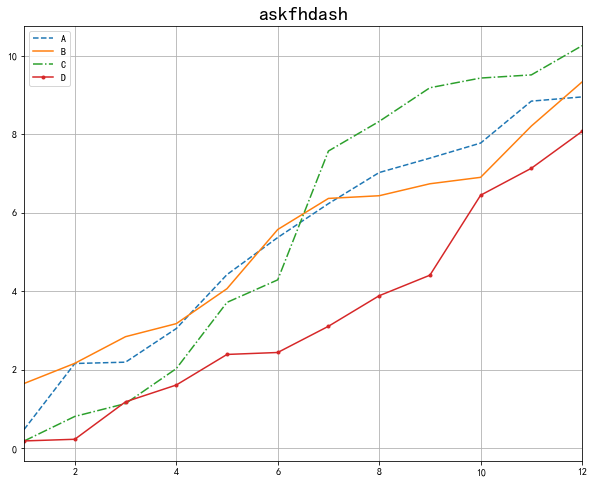

In [267]:
# plt.figure(figsize=(10,8))
df.plot(kind='line',figsize=(10,8),style=['--','-','-.','.-'],grid=True,xlim=(1,12))
plt.title('askfhdash',fontsize=20)

           A         B         C         D
0   0.584621  0.220162 -0.325957 -0.801906
10  1.260726  0.444039 -0.790390 -0.768820
20  0.296061  2.613628 -1.552933  1.790565
30  0.076497  2.984263 -2.230844  1.500553
40 -1.376153  2.654137 -1.854895  0.745218
50 -3.128095  1.419163 -1.802880  0.496730
60 -2.858940  2.673082  0.381844 -0.205413
70 -4.291013  1.154214  0.135352 -0.845790
80 -2.835949  1.326594  0.778622 -1.324855
90 -4.302376  1.997715  1.806752 -1.448830


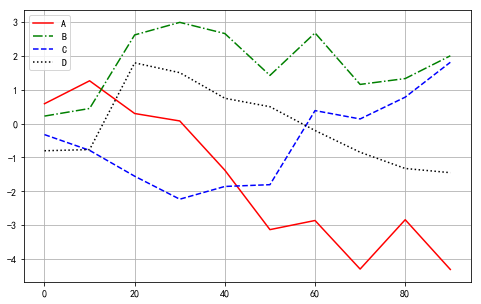

In [175]:
#plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题,或者转换负号为字符串

df.plot(grid=True,style=['r-','g-.','b--','k:'],figsize=(8,5))#绘制线状图

### 3.2.2 柱状图

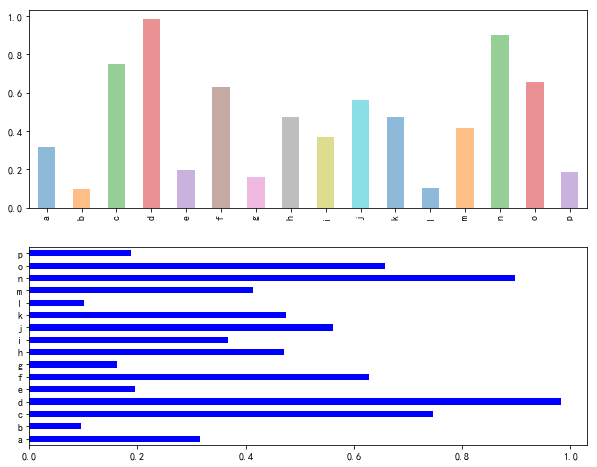

In [298]:
fig3 = plt.figure(figsize=(10,8))
ax=fig3.subplots(2,1)
data = pd.Series(np.random.rand(16),index = list('abcdefghijklmnop'))
data.plot(kind='bar',ax=ax[0],alpha=0.5)
data.plot(kind='barh',ax=ax[1],color='b')

              A         B         C         D
one    0.744588  0.108467  0.035009  0.694742
two    0.649899  0.673526  0.187220  0.077660
three  0.980579  0.424575  0.816088  0.037899
four   0.103113  0.083001  0.324253  0.487825


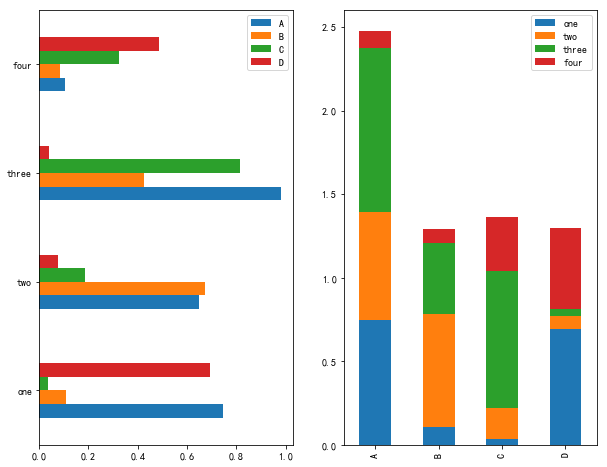

In [306]:
fig4 = plt.figure(figsize=(10,8))
axes = fig4.subplots(1,2)
df = pd.DataFrame(np.random.rand(4,4),index=['one','two','three','four'],columns = list('ABCD'))
print(df)
df.plot(kind='barh',ax=axes[0])
df.T.plot(kind='bar',ax=axes[1],stacked=True)

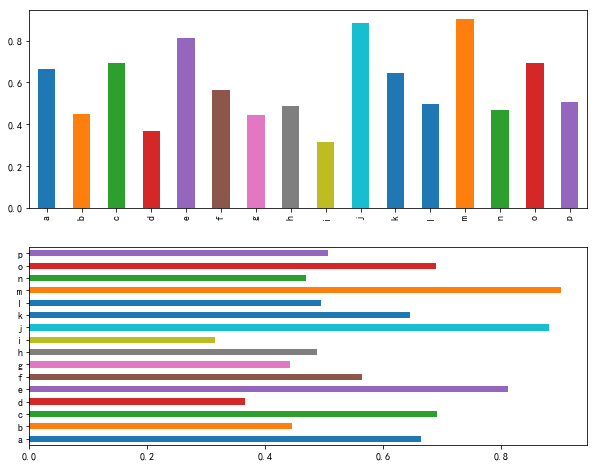

In [276]:
#plt.rcParams['font.sans-serif'] = ['KaiTi']
#plt.rcParams['font.serif'] = ['KaiTi']
fig2=plt.figure(figsize=(10,8))
ax= fig2.subplots(2, 1)
data = pd.Series(np.random.rand(16),index = list('abcdefghijklmnop'))
data.plot(kind='bar',ax=ax[0],alpha=1)
data.plot(kind='barh',ax=ax[1])
# data.plot(kind='bar',ax=ax[0],color='r',alpha=0.7,title='柱状图')
# data.plot(kind='barh',ax=ax[1],color='b',alpha=0.7)

              A         B         C         D
one    0.230855  0.850082  0.949396  0.476834
two    0.671232  0.064453  0.067974  0.407098
three  0.747231  0.494680  0.610687  0.069938
four   0.056603  0.453120  0.250661  0.514148
five   0.002792  0.095606  0.550887  0.746178
six    0.089047  0.679401  0.055595  0.294571


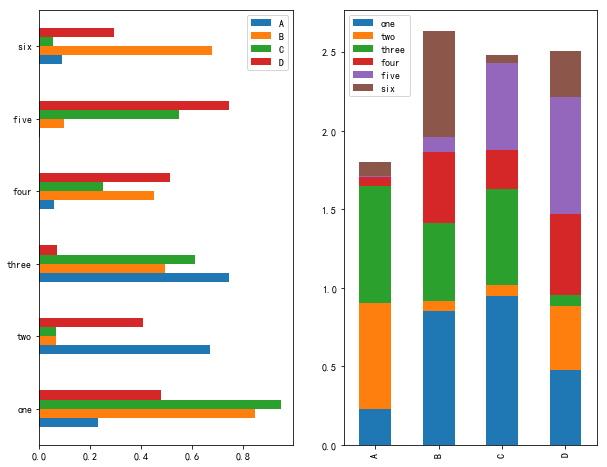

In [281]:
fig4 = plt.figure(figsize=(10,8))
ax=fig4.subplots(1,2)
df = pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],columns = list('ABCD'))
print(df)
df.plot(kind='barh',ax=ax[0])
df.T.plot(kind='bar',ax=ax[1],stacked=True)#绘制堆积柱状图
# ax[1].set_xticklabels(labels=list('abcdef'),rotation=30,fontsize=20)#设置x轴的刻度，改变旋转度，字体尺寸

### 3.2.3 直方图和密度图

安装Scipy：
+ pip install scipy

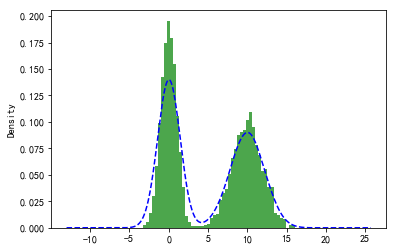

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

comp1 = np.random.normal(0,1,size=2000)
comp2 = np.random.normal(10,2,size=2000)
values = pd.Series(np.concatenate([comp1,comp2]))
values.hist(bins=50,color='g',density=True,alpha=0.7)
values.plot(kind='kde',style='b--')
# plt.grid(True)
# values.shape

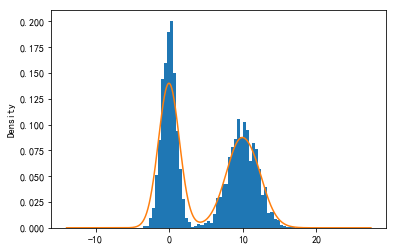

In [318]:
a = np.random.randn(2000) 
b = np.random.normal(10,2,(2000))
d=pd.Series(np.concatenate([a,b]))
d.plot(kind='hist',bins=50,density=True)
d.plot(kind='kde')

# 练习

**作业：**

1.将'311-service-requests.csv'数据集加载到DataFrame中，查看数据集；

2.取出'Complaint Type'对应的列；

3.将'Complaint Type'列中的数值频数计算，并进行排序；(提示：求频数，用value_counts()函数)

4.针对排序好的数据，取出Top5；

5.针对Top5画出柱状图，并将图形保存。

In [ ]:
import matplotlib.pyplot as plt #载入matplotlib.pyplot模块
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(8,5))
complaints = pd.read_csv('data/311-service-requests.csv')
complaints['Complaint Type'].value_counts().head().plot(kind='bar')
data=complaints['Complaint Type'].value_counts().head()
print(data)
plt.xticks(range(len(data.index)),['HEATING','CONSTRUCTION','LIGHT CONDITION','PLUMBING','DOF REQUEST'],rotation=30,fontsize=10)
x=range(len(data.index))
y=list(data.values)
print(y)
#添加文本数字信息 
for a,b in zip(x,y):
    plt.text(a, b+100,str(b), ha='center', va= 'bottom',fontsize=12)
plt.title('Complain Type Top5',fontsize=20)
plt.ylim(0,15000)
plt.savefig('图片/Image.png',dpi=300,bbox_inches='tight')
plt.show()